In [86]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
#style.use('seaborn')
import matplotlib.pyplot as plt

In [87]:
import numpy as np
import pandas as pd

In [88]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [90]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [91]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [92]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [93]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [94]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [95]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [96]:
print("Exploratory Climate Analysis")

Exploratory Climate Analysis


In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [98]:
### Measurement.date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [99]:
### Station.station
session.query(Station.station).order_by(Station.station).first()

('USC00511918')

In [100]:
### Measurement.date, Measurement.prcp
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).first()

('2010-01-01', 0.08)

In [101]:
# Latest Date in Measurement
latestDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'{latestDate}')

('2017-08-23',)


In [102]:
# queryDate: one year ago from latestDate 

latestDateInStr = str(latestDate)

## current year
queryYear = int(latestDateInStr[2:6]) -1
#print(f'{queryYear}')

#current month
queryMonth = latestDateInStr[7:9]
#print(queryMonth)

#query day
queryDay= int(latestDateInStr[10:12]) + 1
#print(f'{queryDay}')

queryDate = str(queryYear) + '-' + queryMonth + '-' + str(queryDay)
print(f'{queryDate}')


2016-08-24


In [113]:
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).order_by(Measurement.date).all()
#print(f'{measurementDatePrcp}')

#results = list(np.ravel(measurementDatePrcpResults))

df_measurementDatePrcpResults = pd.DataFrame(measurementDatePrcpResults)
#df_measurementDatePrcpResults.head()

#df_measurementDatePrcpResults.set_index('date', inplace=True)
#df_measurementDatePrcpResults.head()
dateList = df_measurementDatePrcpResults['date'].to_list()
#print(f'{dateList}')
prcpList = df_measurementDatePrcpResults['prcp'].to_list()
#print(f'{prcpList}')



###
# Unpack the `emoji_id` and `scores` from results and save into separate lists
#dateList = [result[0] for result in measurementDatePrcpResults]
#prcpList = [result[1] for result in measurementDatePrcpResults]

#print(f'{dateList}')
#print(f'{prcpList}')


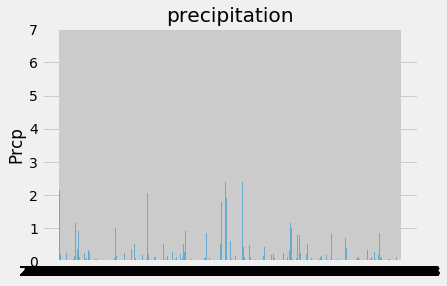

In [114]:
### test
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
#import matplotlib.pyplot as plt

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(dateList))
#performance = [10,8,6,4,2,1]

plt.bar(y_pos, prcpList, align='center', alpha=0.5)
plt.xticks(y_pos, dateList)
plt.ylabel('Prcp')
#plt.xlabel('Date')
plt.title('precipitation')

plt.show()

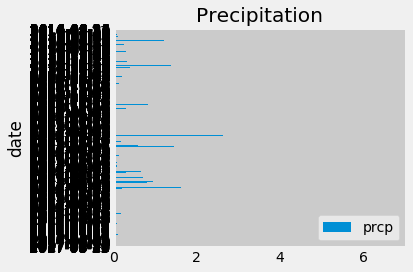

In [117]:
#test, test
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults_2 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).order_by(Measurement.date).all()
#print(f'{measurementDatePrcpResults}')

df_measurementDatePrcpResults_2 = pd.DataFrame(measurementDatePrcpResults_2, columns=['date', 'prcp'])

df_measurementDatePrcpResults_2.set_index('date', inplace=True, )
df_measurementDatePrcpResults_2.head(10)


### Plot using Pandas


###
###
# Plot the dataframe as a horizontal bar chart using pandas plotting
df_measurementDatePrcpResults_2.iloc[::-1].plot.barh(title="Precipitation")
plt.tight_layout()
plt.show()




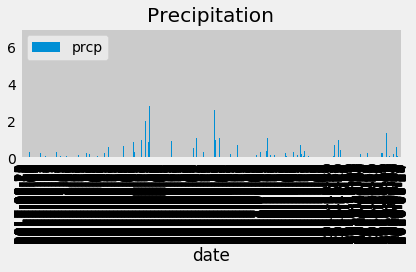

In [118]:
#test, test. test
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults_3 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).order_by(Measurement.date).all()
#print(f'{measurementDatePrcpResults}')

df_measurementDatePrcpResults_3 = pd.DataFrame(measurementDatePrcpResults_3, columns=['date', 'prcp'])

df_measurementDatePrcpResults_3.set_index('date', inplace=True, )
df_measurementDatePrcpResults_3.head(10)


### Plot using Pandas


###
###
# Plot the dataframe as a horizontal bar chart using pandas plotting
df_measurementDatePrcpResults_3.iloc[::-1].plot.bar(title="Precipitation")
plt.tight_layout()
plt.show()

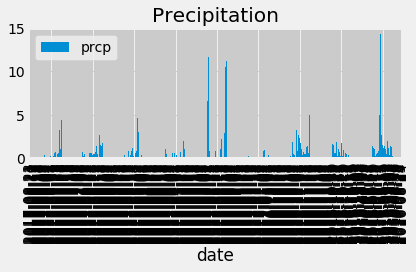

In [142]:
### test 4
#expenses=db.session.query(Expense,func.sum(Expense.value)).group_by(Expense.date).filter(CostCenter.id.in_([1,2,3]))

### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults_4 = session.query(Measurement.date, func.sum(Measurement.prcp)).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).\
group_by(Measurement.date).order_by(Measurement.date).all()

#print(f'{measurementDatePrcpResults_4}')

df_measurementDatePrcpResults_4 = pd.DataFrame(measurementDatePrcpResults_4, columns=['date', 'prcp'])
#df_measurementDatePrcpResults_4.head(10)

df_measurementDatePrcpResults_4.set_index('date', inplace=True, )
df_measurementDatePrcpResults_4.head(10)


### Plot using Pandas


###
###
# Plot the dataframe as a horizontal bar chart using pandas plotting
df_measurementDatePrcpResults_4.iloc[::-1].plot.bar(title="Precipitation")
plt.tight_layout()
plt.show()


In [119]:
### test 4
#expenses=db.session.query(Expense,func.sum(Expense.value)).group_by(Expense.date).filter(CostCenter.id.in_([1,2,3]))


#test, test. test
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults_4 = session.query(Measurement.date, func.sum(Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).group_by(Measurement.date).order_by(Measurement.date).all()
#print(f'{measurementDatePrcpResults_4}')

df_measurementDatePrcpResults_4 = pd.DataFrame(measurementDatePrcpResults_4, columns=['date', 'prcp'])

df_measurementDatePrcpResults_4.set_index('date', inplace=True, )
df_measurementDatePrcpResults_4.head(10)


### Plot using Pandas


###
###
# Plot the dataframe as a horizontal bar chart using pandas plotting
df_measurementDatePrcpResults_4.iloc[::-1].plot.bar(title="Precipitation")
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-119-20679edcbd36>, line 12)

In [58]:
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).order_by(Measurement.date).all()
#print(f'{measurementDatePrcp}')

#results = list(np.ravel(measurementDatePrcpResults))

df_measurementDatePrcpResultsIndexed = pd.DataFrame(measurementDatePrcpResults)
#df_measurementDatePrcpResults.head()

df_measurementDatePrcpResultsIndexed.set_index('date', inplace=True)
#df_measurementDatePrcpResults.head()
datdListIndexed = df_df_measurementDatePrcpResultsIndexed.to_list()
#print(f'{dateList}')
prcpList = df_measurementDatePrcpResults['prcp'].to_list()
#print(f'{prcpList}')



###
# Unpack the `emoji_id` and `scores` from results and save into separate lists
#dateList = [result[0] for result in measurementDatePrcpResults]
#prcpList = [result[1] for result in measurementDatePrcpResults]

#print(f'{dateList}')
#print(f'{prcpList}')


NameError: name 'df_df_measurementDatePrcpResultsIndexed' is not defined

Text(0.5, 0.98, 'Categorical Plotting')

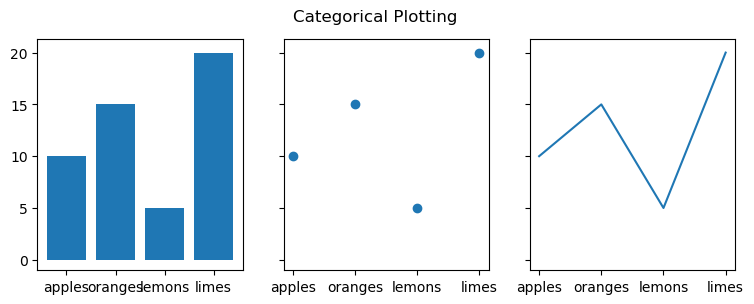

In [36]:
### test
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')


Text(0.5, 0.98, 'Categorical Plotting')

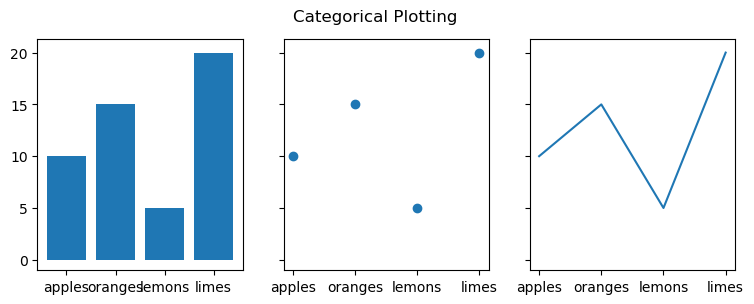

In [35]:
### test
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')


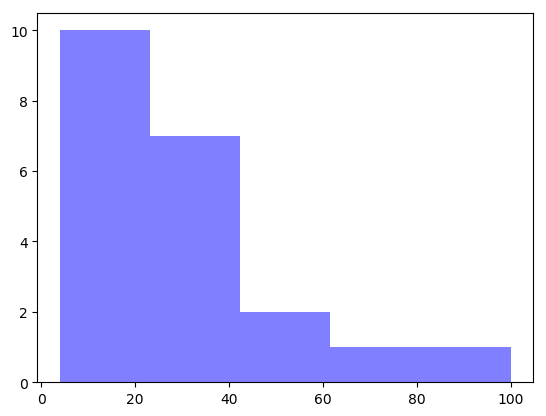

In [31]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

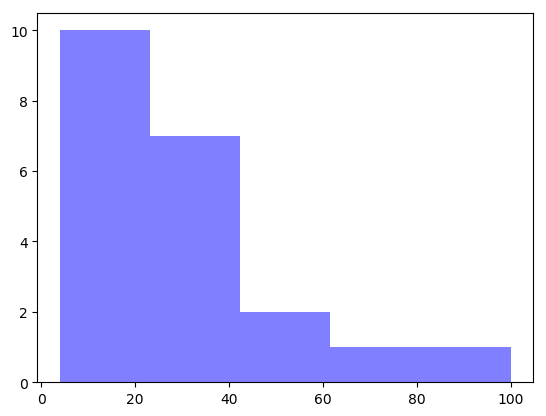

In [32]:
### test
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [33]:
### Retrieve from Measurement Table
### Measurement.date and prcp in last 12 months
measurementDatePrcpResults = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= queryDate).filter(Measurement.prcp >= 0).order_by(Measurement.date).all()
#print(f'{measurementDatePrcp}')

###results = list(np.ravel(measurementDatePrcpResults))


###
# Unpack the `emoji_id` and `scores` from results and save into separate lists
dateList = [result[0] for result in measurementDatePrcpResults]
prcpList = [result[1] for result in measurementDatePrcpResults]

print(f'{dateList}')
#print(f'{prcpList}')





['2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-27', '2016-08-27', '2016-08-27', '2016-08-27', '2016-08-27', '2016-08-28', '2016-08-28', '2016-08-28', '2016-08-28', '2016-08-28', '2016-08-28', '2016-08-29', '2016-08-29', '2016-08-29', '2016-08-29', '2016-08-29', '2016-08-29', '2016-08-30', '2016-08-30', '2016-08-30', '2016-08-30', '2016-08-30', '2016-08-30', '2016-08-31', '2016-08-31', '2016-08-31', '2016-08-31', '2016-08-31', '2016-09-01', '2016-09-01', '2016-09-01', '2016-09-01', '2016-09-01', '2016-09-02', '2016-09-02', '2016-09-02', '2016-09-02', '2016-09-02', '2016-09-03', '2016-09-03', '2016-09-03', '2016-09-03', '2016-09-03', '2016-09-04', '2016-09-04', '2016-09-04', '2016-09-04', '2016-09-04', '2016-09-05', '2016-09-05', '2016-09-05', '2016-09-05', '2016

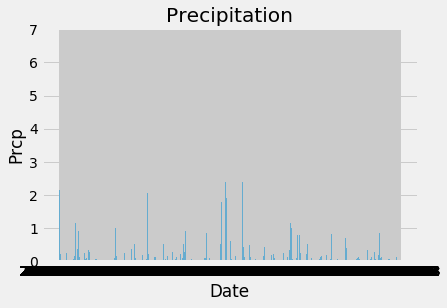

In [85]:
### test
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
#import matplotlib.pyplot as plt

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(dateList))
#performance = [10,8,6,4,2,1]

plt.bar(y_pos, prcpList, align='center', alpha=0.5)
plt.xticks(y_pos, dateList)
plt.ylabel('Prcp')
plt.xlabel('Date')
plt.title('Precipitation')

plt.show()

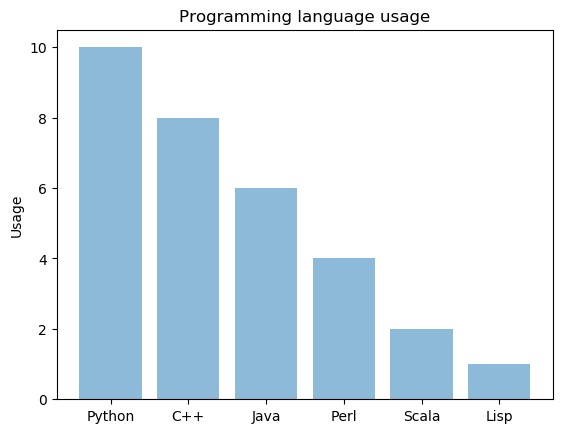

In [29]:
### test
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

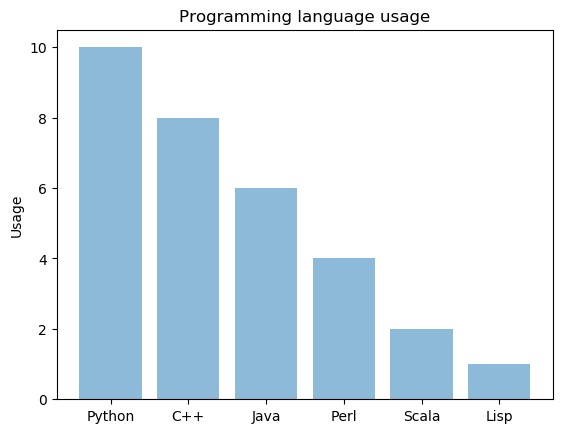

In [30]:
### test
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

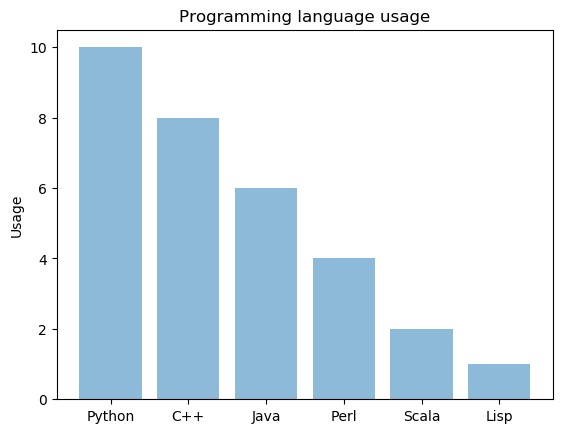

In [22]:
### test
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [38]:
### pandas dataframe
### plot
#df_measurementDatePrcpResults.set_index('date', inplace=True)

#df_measurementDatePrcpResults['prcp']
df_measurementDatePrcpResults['date']
df_measurementDatePrcpResults['prcp']

0       0.08
1       2.15
2       2.28
3       1.22
4       2.15
5       1.45
6       0.08
7       0.08
8       0.00
9       0.00
10      0.21
11      0.06
12      0.11
13      0.00
14      0.03
15      0.02
16      0.04
17      0.00
18      0.01
19      0.00
20      0.18
21      0.02
22      0.00
23      0.12
24      0.01
25      0.14
26      0.14
27      0.14
28      0.60
29      2.07
        ... 
1985    0.00
1986    0.06
1987    0.32
1988    0.42
1989    0.00
1990    0.07
1991    0.12
1992    0.42
1993    0.00
1994    0.05
1995    0.01
1996    0.13
1997    0.00
1998    0.00
1999    0.06
2000    0.00
2001    0.00
2002    0.09
2003    0.00
2004    0.01
2005    0.00
2006    0.02
2007    0.56
2008    0.00
2009    0.00
2010    0.50
2011    0.00
2012    0.00
2013    0.08
2014    0.45
Name: prcp, Length: 2015, dtype: float64

In [ ]:
### pandas dataframe
### plot
### set index
#df_measurementDatePrcpResults.set_index('date', inplace=True)

In [ ]:
### pandas dataframe
### plot

#df_measurementDatePrcpResults.set_index('date', inplace=True)
#df_measurementDatePrcpResults.head()
df_measurementDatePrcpResults['prcp']
#dateList=df_measurementDatePrcpResults['date'].tolist()
df_measurementDatePrcpResults.plot.bar()
plt.tight_layout()
plt.show()
#df_measurementDatePrcpResults


In [20]:
session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2010-01-06').order_by(Measurement.date).all()

[('2010-01-06', None),
 ('2010-01-06', 0.02),
 ('2010-01-06', 0.11),
 ('2010-01-06', 0.01),
 ('2010-01-06', 0.08),
 ('2010-01-06', 0.36),
 ('2010-01-07', 0.06),
 ('2010-01-07', 0.38),
 ('2010-01-07', None),
 ('2010-01-07', 0.7),
 ('2010-01-07', 0.17),
 ('2010-01-07', 0.04),
 ('2010-01-07', 0.3),
 ('2010-01-08', 0.0),
 ('2010-01-08', 0.01),
 ('2010-01-08', 0.03),
 ('2010-01-08', 0.02),
 ('2010-01-08', 0.0),
 ('2010-01-08', 0.0),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-09', 0.01),
 ('2010-01-09', 0.01),
 ('2010-01-09', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-10', 0.01),
 ('2010-01-10', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-10', 0.01),
 ('2010-01-11', 0.01),
 ('2010-01-11', 0.03),
 ('2010-01-11', 0.14),
 ('2010-01-11', 0.48),
 ('2010-01-11', 0.03),
 ('2010-01-11', 0.05),
 ('2010-01-11', 0.14),
 ('2010-01-12', 0.0),
 ('2010-01-12', 0.0),
 ('2010-01-12', 0.02),
 ('201

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


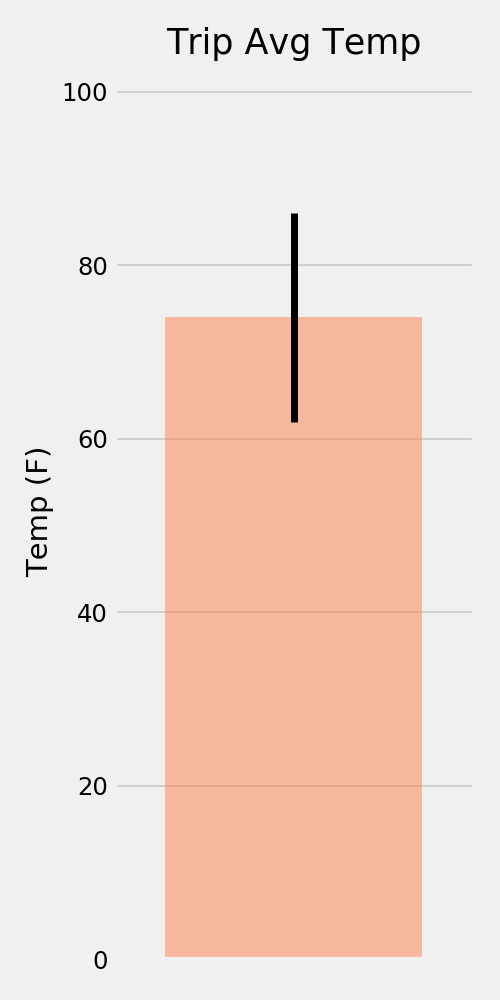

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


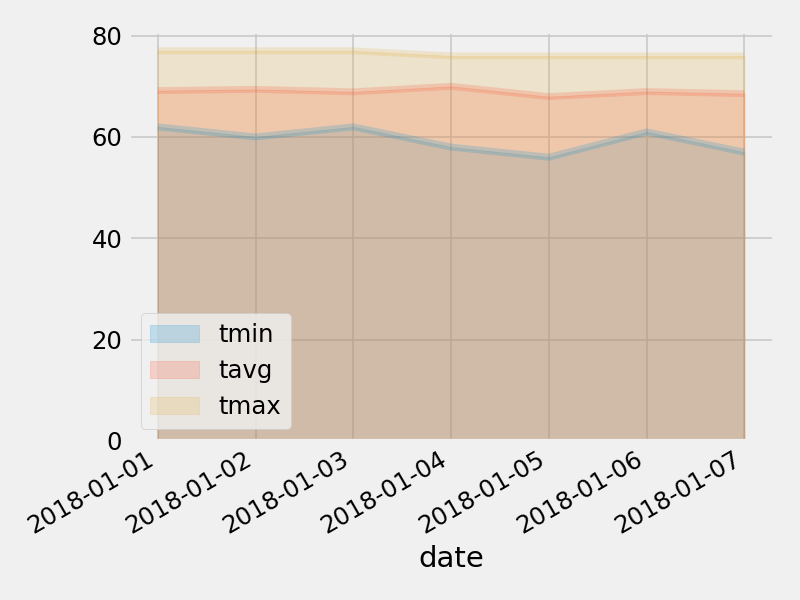

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
